In [13]:
# performing linear algebra
import numpy as np 

# data processing
import pandas as pd

# visualisation
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

print (data.head)

<bound method NDFrame.head of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0  

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
data.drop(['Unnamed: 32', 'id'], axis = 1)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)


x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

# This code is modified by Susobhan Akhuli


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.15, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (32, 483)
x test:  (32, 86)
y train:  (483,)
y test:  (86,)


Cost after iteration 0: 0.693413
Cost after iteration 10: 0.692440
Cost after iteration 20: 0.691842
Cost after iteration 30: 0.691474
Cost after iteration 40: 0.691247
Cost after iteration 50: 0.691107
Cost after iteration 60: 0.691020
Cost after iteration 70: 0.690966
Cost after iteration 80: 0.690933
Cost after iteration 90: 0.690912
Cost after iteration 100: 0.690899
Cost after iteration 110: 0.690891
Cost after iteration 120: 0.690886
Cost after iteration 130: 0.690883
Cost after iteration 140: 0.690881


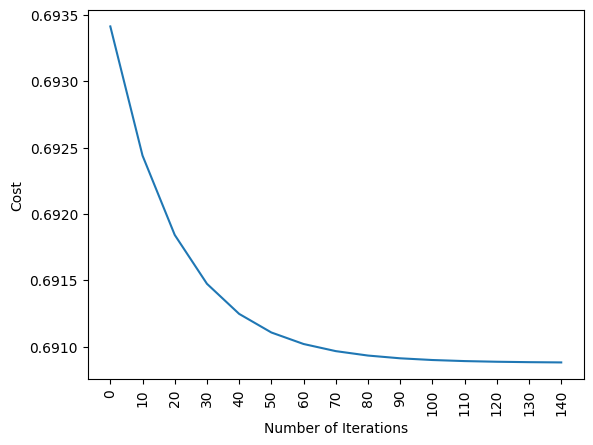

Train accuracy: 51.76 %
Test accuracy: 46.67 %


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias
def initialize_weights_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

# Forward and backward propagation
def forward_backward_propagation(w, b, x_train, y_train):
    m = x_train.shape[1]
    
    # Forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    cost = (-1 / m) * np.sum(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    
    # Backward propagation
    dw = (1 / m) * np.dot(x_train, (y_head - y_train).T)
    db = (1 / m) * np.sum(y_head - y_train)
    
    gradients = {"dw": dw, "db": db}
    
    return cost, gradients

# Update weights using gradient descent
def update(w, b, x_train, y_train, learning_rate, num_iterations):
    cost_list = []
    index = []

    for i in range(num_iterations):
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)

        # Update weights
        w -= learning_rate * gradients["dw"]
        b -= learning_rate * gradients["db"]

        if i % 10 == 0:
            cost_list.append(cost)
            index.append(i)
            print(f"Cost after iteration {i}: {cost:.6f}")

    # Plot cost function
    plt.plot(index, cost_list)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.show()

    return {"weight": w, "bias": b}, cost_list

# Prediction function
def predict(w, b, x_test):
    z = sigmoid(np.dot(w.T, x_test) + b)
    return (z > 0.5).astype(int)

# Logistic regression function
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.1, num_iterations=150):
    dimension = x_train.shape[0]
    w, b = initialize_weights_and_bias(dimension)

    parameters, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)

    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)

    print(f"Train accuracy: {100 - np.mean(np.abs(y_prediction_train - y_train)) * 100:.2f} %")
    print(f"Test accuracy: {100 - np.mean(np.abs(y_prediction_test - y_test)) * 100:.2f} %")

# Sample Data (Replace with actual dataset)
np.random.seed(42)
X = np.random.randn(500, 3)  # 500 samples, 3 features
y = (np.random.rand(500, 1) > 0.5).astype(int)  # Random binary labels

# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train).T
x_test = scaler.transform(x_test).T

# Reshape y_train and y_test
y_train = y_train.T
y_test = y_test.T

# Train the model
logistic_regression(x_train, y_train, x_test, y_test, learning_rate=0.1, num_iterations=150)


In [20]:
from sklearn.impute import SimpleImputer
from sklearn import linear_model

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and test data
x_train = imputer.fit_transform(x_train.T).T
x_test = imputer.transform(x_test.T).T

logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150) 
print("test accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T))) 
print("train accuracy: {} ".format(
    logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

# This code is modified by Susobhan Akhuli


test accuracy: 0.49333333333333335 
train accuracy: 0.5223529411764706 


c:\Users\SATHISHKUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SATHISHKUMAR\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
